In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [3]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
data = pd.read_csv('train.csv', header=0, sep='\t', encoding="utf8") #, delimiter=';'
data_test = pd.read_csv('test.csv', header=0, sep='\t', encoding="utf8") #, delimiter=';'
#data = data.dropna() #(24712, 22) 16476
print(data.shape)
#print(list(data.columns))
target = 'target'
data = data.drop(['_id'], axis=1)
data_test = data_test.drop(['_id'], axis=1)
#data.info()
data.describe(include='all').T
#data.isnull().sum()
#data.head()

(24712, 22)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,24712,NaN,NaN,NaN,40.0302,10.4623,17,32,38,47,98
job,24712,12,admin.,6254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,24712,4,married,14871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,24712,8,university.degree,7309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,24712,3,no,19567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,24712,3,yes,12934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,24712,3,no,20334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,24712,2,cellular,15729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,24712,10,may,8199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,24712,5,thu,5144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
X_col=[i for i in data.columns if i not in "target"]
X = data[X_col]
Y = data.target
num_features = ['age', 'duration','campaign', 'pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']  
cat_features = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
#[1,2,3,4,5,6,7,8,9,14]

# log reg 0.934

In [6]:
X_with_dummies = pd.get_dummies( X, columns = cat_features )
X_train, X_test, Y_train, Y_test = train_test_split(X_with_dummies, Y, test_size=0.33, random_state=42)

In [7]:
#logreg
scores_test = []
scores_train = []

for k in np.logspace(-3.0, 3.0, num=7, base=2.0):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('lin_reg', LogisticRegression(C=k))
    ])
    model.fit(X_train, Y_train, )
    
    y_hat_test = model.predict_proba(X_test)
    scores_test.append(roc_auc_score(Y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_train.append(roc_auc_score(Y_train, y_hat_train[:, 1]))

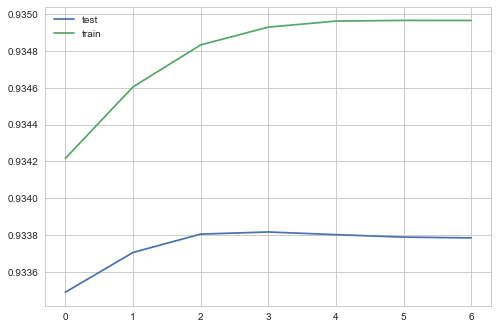

In [8]:
plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()
plt.show()

In [9]:
scores_test[4]

0.93380284849164519

# K-means 0.85

In [73]:
X_with_dummies = pd.get_dummies( X, columns = cat_features )
X_train, X_test, Y_train, Y_test = train_test_split(X_with_dummies, Y, test_size=0.33, random_state=42)

In [74]:
#k-means
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X_train, Y_train)
y_hat = knn.predict(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [76]:
#k-means
scores_test = []
scores_train = []

for k in range(1, 15):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(X_train, Y_train, )
    
    y_hat_test = model.predict_proba(X_test)
    scores_test.append(roc_auc_score(Y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_train.append(roc_auc_score(Y_train, y_hat_train[:, 1]))

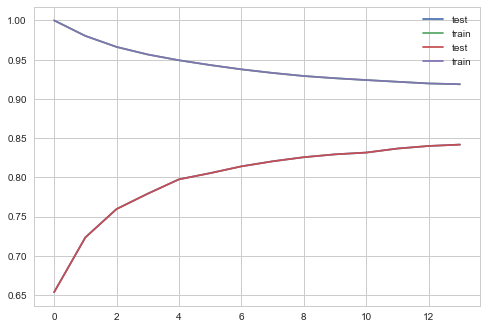

In [78]:
plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()
plt.show()

# trees AUC 0.92

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.learning_curve import validation_curve

C:\Anaconda2\envs\py3k\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda2\envs\py3k\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [124]:
X_with_dummies = pd.get_dummies( X, columns = cat_features )
X_train, X_test, Y_train, Y_test = train_test_split(X_with_dummies, Y, test_size=0.33, random_state=42)

In [127]:
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132)
#train_scores, valid_scores = validation_curve(model, X_train, Y_train, 'max_depth', range(1, 10), cv=cv, scoring='roc_auc')
scores_test = []
scores_train = []

for k in range(1, 15):
    model = Pipeline([
        ('dt', DecisionTreeClassifier(max_depth=k,random_state=42))
    ])
    model.fit(X_train, Y_train, )
    
    y_hat_test = model.predict_proba(X_test)
    scores_test.append(roc_auc_score(Y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_train.append(roc_auc_score(Y_train, y_hat_train[:, 1]))

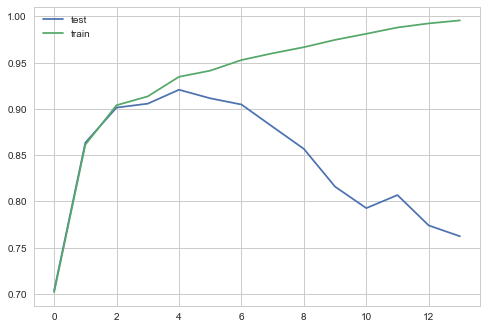

In [128]:
plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()
plt.show()

In [130]:
scores_test[4]

0.92070195506710029

# CatBoost 0.935

In [10]:
# initialize data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
train_data = X_train
train_label = Y_train
test_data = X_test

In [11]:
from catboost import CatBoostRegressor, CatBoostClassifier
from catboost import Pool, CatBoost

In [14]:
#Cat boost
train_pool = Pool(train_data, train_label, cat_features=[1,2,3,4,5,6,7,8,9,14])
test_pool = Pool(test_data, cat_features=[1,2,3,4,5,6,7,8,9,14]) 
scores_cat_test = []
scores_cat_train = []

for k in range(12, 17):
    model = Pipeline([
        ('catboost', CatBoostClassifier(iterations=2, depth=k, learning_rate=1, loss_function='Logloss', logging_level='Verbose'))
    ])
    model.fit(train_pool)
    
    y_hat_test = model.predict_proba(X_test)
    scores_cat_test.append(roc_auc_score(Y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_cat_train.append(roc_auc_score(Y_train, y_hat_train[:, 1]))

0:	learn: 0.2119076	total: 83.2ms	remaining: 83.2ms
1:	learn: 0.1884481	total: 366ms	remaining: 0us
0:	learn: 0.2142455	total: 1.19s	remaining: 1.19s
1:	learn: 0.1850754	total: 8.54s	remaining: 0us
0:	learn: 0.2146922	total: 268ms	remaining: 268ms
1:	learn: 0.1859766	total: 2.27s	remaining: 0us
0:	learn: 0.2356190	total: 156ms	remaining: 156ms
1:	learn: 0.2036700	total: 740ms	remaining: 0us
0:	learn: 0.2220131	total: 61.2ms	remaining: 61.2ms

Iteration with suspicious time 43.4 sec ignored in overall statistics.
1:	learn: 0.1760621	total: 61.2ms	remaining: 61.2ms


In [15]:
scores_cat_test

[0.92818511457515607,
 0.93159956637135066,
 0.92755119434787492,
 0.91631497887929436,
 0.93635445403910145]

In [16]:
scores_cat_train

[0.93520343292489716,
 0.93845985449210922,
 0.93753560126437718,
 0.91884090360056558,
 0.94568945573967489]

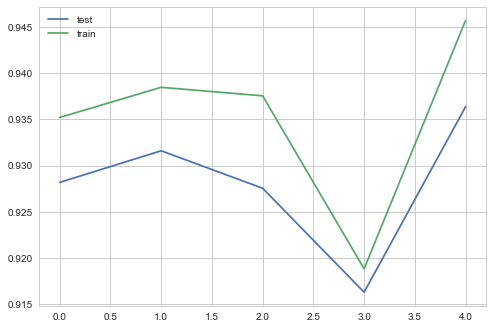

In [17]:
plt.plot(scores_cat_test, label='test')
plt.plot(scores_cat_train, label='train')
plt.legend()
plt.show()

In [18]:
#Cat boost
train_pool = Pool(train_data, train_label, cat_features=[1,2,3,4,5,6,7,8,9,14])
test_pool = Pool(test_data, cat_features=[1,2,3,4,5,6,7,8,9,14]) 
scores_cat_test = []
scores_cat_train = []

for k in range(5, 10):
    model = Pipeline([
        ('catboost', CatBoostClassifier(iterations=k, depth=16, learning_rate=1, loss_function='Logloss', logging_level='Verbose'))
    ])
    model.fit(train_pool)
    
    y_hat_test = model.predict_proba(X_test)
    scores_cat_test.append(roc_auc_score(Y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_cat_train.append(roc_auc_score(Y_train, y_hat_train[:, 1]))

0:	learn: 0.1974766	total: 1m 7s	remaining: 4m 28s
1:	learn: 0.1797349	total: 1m 7s	remaining: 1m 41s
2:	learn: 0.1721848	total: 1m 12s	remaining: 48.2s
3:	learn: 0.1577531	total: 2m 47s	remaining: 41.9s
4:	learn: 0.1575701	total: 2m 47s	remaining: 0us
0:	learn: 0.2119001	total: 3.78s	remaining: 18.9s
1:	learn: 0.1815032	total: 8.9s	remaining: 17.8s
2:	learn: 0.1641670	total: 54.6s	remaining: 54.6s
3:	learn: 0.1636383	total: 54.8s	remaining: 27.4s
4:	learn: 0.1594936	total: 57.3s	remaining: 11.5s
5:	learn: 0.1566584	total: 1m 3s	remaining: 0us
0:	learn: 0.2373586	total: 277ms	remaining: 1.66s
1:	learn: 0.1875767	total: 942ms	remaining: 2.35s
2:	learn: 0.1747122	total: 5.63s	remaining: 7.51s
3:	learn: 0.1744456	total: 5.76s	remaining: 4.32s
4:	learn: 0.1711071	total: 7.95s	remaining: 3.18s
5:	learn: 0.1669483	total: 9.12s	remaining: 1.52s
6:	learn: 0.1600052	total: 13s	remaining: 0us
0:	learn: 0.1965377	total: 4.27s	remaining: 29.9s
1:	learn: 0.1787196	total: 7.13s	remaining: 21.4s
2:	l

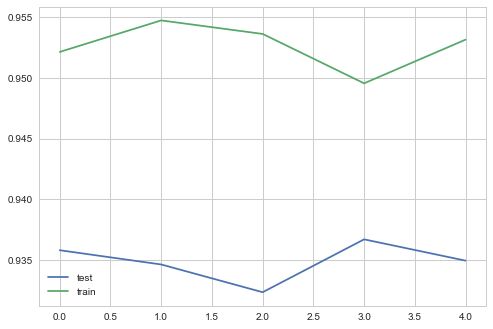

In [19]:
plt.plot(scores_cat_test, label='test')
plt.plot(scores_cat_train, label='train')
plt.legend()
plt.show()

In [108]:
model = Pipeline([
    ('catboost', CatBoostClassifier(iterations=10, depth=15, learning_rate=1, loss_function='Logloss', logging_level='Verbose'))
])
model.fit(train_pool)
    
y_hat_test = model.predict_proba(X_test)
scores_cat_test.append(roc_auc_score(Y_test, y_hat_test[:, 1]))
    
y_hat_train = model.predict_proba(X_train)
print(roc_auc_score(Y_train, y_hat_train[:, 1]))

0:	learn: 0.2081895	total: 158ms	remaining: 631ms
1:	learn: 0.1913172	total: 263ms	remaining: 394ms
2:	learn: 0.1838183	total: 608ms	remaining: 405ms
3:	learn: 0.1742678	total: 1.01s	remaining: 253ms
4:	learn: 0.1728915	total: 1.05s	remaining: 0us
0.947525499697


In [22]:
#Cat boost
pool = Pool(X, Y, cat_features=[1,2,3,4,5,6,7,8,9,14])
scores_cat_test = []
scores_cat_train = []


model = Pipeline([
    ('catboost', CatBoostClassifier(iterations=10, depth=16, learning_rate=1, loss_function='Logloss', logging_level='Verbose'))
])
model.fit(pool)
    
y_hat_test = model.predict_proba(X_test)
scores_cat_test.append(roc_auc_score(Y_test, y_hat_test[:, 1]))
    
y_hat_train = model.predict_proba(X_train)
scores_cat_train.append(roc_auc_score(Y_train, y_hat_train[:, 1]))

0:	learn: 0.2119746	total: 160ms	remaining: 1.44s

Iteration with suspicious time 70.7 sec ignored in overall statistics.
1:	learn: 0.1855338	total: 160ms	remaining: 1.44s
2:	learn: 0.1804156	total: 607ms	remaining: 2.13s
3:	learn: 0.1750856	total: 5.74s	remaining: 11.5s
4:	learn: 0.1722174	total: 11.9s	remaining: 14.8s
5:	learn: 0.1632247	total: 1m 27s	remaining: 1m 9s
6:	learn: 0.1608936	total: 1m 28s	remaining: 44.1s
7:	learn: 0.1578033	total: 1m 35s	remaining: 27.2s
8:	learn: 0.1574194	total: 1m 35s	remaining: 12s
9:	learn: 0.1479480	total: 3m 21s	remaining: 0us


In [23]:
to_export_4 = model.predict_proba(data_test)

In [24]:
np.savetxt(r'Olapin_test4.csv',to_export_4,delimiter=',', fmt=('%f'))